In [1]:
import matplotlib.pyplot as plt
import numpy as np
# 

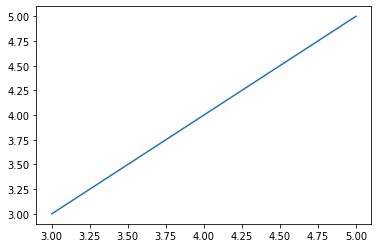

In [3]:
a = np.array([3,4,5])
plt.figure()
plt.plot(a,a)
plt.show()

In [19]:
data = {}
data['dbpedia'] = {}
data['dbpedia']['mean'] = [float(x) for x in "0.805	0.809	0.810	0.805	0.798	0.790	0.781	0.773	0.762	0.751	0.740	0.728	0.715	0.699	0.679	0.653	0.621	0.575".split("\t")]
data['dbpedia']['std'] =  [float(x) for x in "0.038	0.040	0.039	0.038	0.035	0.032	0.028	0.024	0.022	0.021	0.023	0.025	0.028	0.034	0.042	0.050	0.062	0.069".split('\t')]
data['dbpedia']['baseline'] = 0.756
data['dbpedia']['style'] = ['^', 'blue']
data['dbpedia']['legend'] = "DBPedia"


data['agnews'] = {}
data['agnews']['mean'] = [float(x) for x in "0.822	0.830	0.831	0.831	0.830	0.827	0.825	0.822	0.819	0.816	0.811	0.806	0.802	0.796	0.788	0.782	0.771	0.751".split('\t')]
data['agnews']['std'] = [float(x) for x in "0.015	0.015	0.016	0.016	0.019	0.021	0.025	0.024	0.026	0.027	0.027	0.026	0.026	0.026	0.027	0.024	0.023	0.023".split('\t')]
data['agnews']['baseline'] = 0.799
data['agnews']['style'] = ['o', 'orange']
data['agnews']['legend'] = "AG's News"

data['amazon'] = {}
data['amazon']['mean'] = [float(x) for x in "0.918	0.921	0.923	0.924	0.925	0.925	0.925	0.926	0.926	0.926	0.926	0.926	0.926	0.925	0.925	0.925	0.924	0.923".split('\t')]
data['amazon']['std'] = [float(x) for x in "0.021	0.021	0.020	0.020	0.020	0.020	0.020	0.019	0.019	0.019	0.019	0.019	0.019	0.019	0.019	0.018	0.019	0.020".split('\t')]
data['amazon']['baseline'] = 0.913
data['amazon']['style'] = ['+','green']
data['amazon']['legend'] = "Amazon"

data['imdb'] = {}
data['imdb']['mean'] = [float(x) for x in "0.902	0.907	0.909	0.910	0.911	0.913	0.913	0.914	0.914	0.915	0.916	0.916	0.916	0.916	0.917	0.917	0.918	0.917".split('\t')]
data['imdb']['std'] =  [float(x) for x in "0.042	0.039	0.037	0.036	0.035	0.034	0.033	0.033	0.033	0.033	0.033	0.033	0.033	0.033	0.033	0.034	0.033	0.035".split("\t")]
data['imdb']['baseline'] = 0.908
data['imdb']['style'] = ['x','purple']
data['imdb']['legend'] = 'IMDB'

data['xaxis'] = np.array([i/20 for i in range(1,19)])


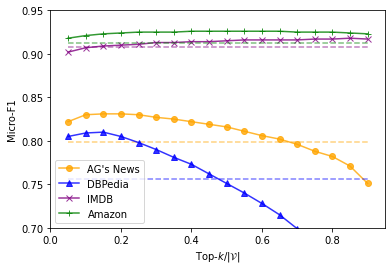

In [28]:
plt.figure()
for dataset in ['agnews', 'dbpedia', 'imdb', 'amazon']:
    mean = np.array(data[dataset]['mean'])
    plt.plot(data['xaxis'], mean, data[dataset]['style'][0]+'-',color=data[dataset]['style'][1],label=data[dataset]['legend'],alpha=0.8)
    baseline = np.zeros_like(data['xaxis'])+data[dataset]['baseline']
    plt.plot(data['xaxis'], baseline, "--",color=data[dataset]['style'][1], alpha=0.5)



plt.xlim(0, 0.95)
plt.ylim(0.7,0.95)
plt.legend()
plt.ylabel("Micro-F1")
plt.xlabel(r"Top-$k$/$|\mathcal{V}|$")
# plt.show()
plt.savefig("../plots/hyperpara-k-2.pdf")

# below for codes for top word vis_new

In [1]:
import pickle as pkl
file = "../outputlogs/zs_KPT_mean_toppredwords_agnews/00006/visualize_top_choice/dataset_agnews_temp_0_seed_144.pkl"
with open(file, 'rb')  as fin:
    zip_data = pkl.load(fin)

mykeys = list(zip_data.keys())




In [2]:
features = []
import csv
with open("../datasets/agnews/test.csv", encoding='utf8') as f:
    reader = csv.reader(f, delimiter=',')
    for idx, row in enumerate(reader):
        label, headline, body = row
        text_a = headline.replace('\\', ' ')
        text_b = body.replace('\\', ' ')
        features.append({"text_a": text_a, "text_b":text_b, "label":int(label)-1})




In [3]:
words_ranks = {}
words_ranks_correct = {}

sorted_wordss = []

for gtclass in range(4):
    words_ranks_les_10 = {}
    for word in zip_data:
        words_ranks_les_10[word]= 0 
        for rank, pred, truth, idx in zip_data[word]:
            if truth==gtclass and pred==gtclass and rank<5:
                words_ranks_les_10[word] += 1
    sorted_words = sorted(words_ranks_les_10.items(), key=lambda x:-x[1])
    wordname, wordfreq = list(zip(*sorted_words))
    sorted_wordss.append([[w[1:] for w in wordname], [x for x in wordfreq]])

# sorted_wordss|

        

/home/hushengding/.cache/matplotlib


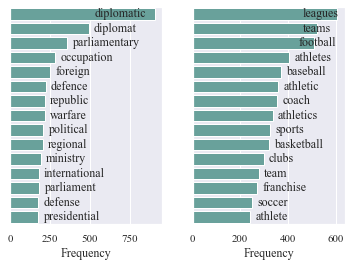

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
print(matplotlib.get_cachedir())
sns.set(style="darkgrid")
plt.rc('font',family='Times New Roman')
def add_value_labels(ax, spacing, labels, specials=None):

    for rectid, rect in enumerate(ax.patches):
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        if specials is not None:
            space = spacing +specials[rectid]
        else:
            space = spacing
        ax.annotate(
                labels[rectid],                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='left',                # Horizontally center label
                size=12,
                va='center') 

# sns.color_palette("light:#5A9", as_cmap=True)
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
plt.sca(ax1)
ax = sns.barplot(y=sorted_wordss[0][0][:15], x=np.array(sorted_wordss[0][1][:15]), ax=ax1, color='#60aaa2')
add_value_labels(ax1, spacing=5, labels=sorted_wordss[0][0][:15], specials=[-65]+[0]*14)
plt.yticks([])
# plt.xlabel(r'')
plt.xlabel('Frequency')

plt.sca(ax2)
ax = sns.barplot(y=sorted_wordss[1][0][:15], x=np.array(sorted_wordss[1][1][:15]), ax=ax2, color='#60aaa2')
add_value_labels(ax2, spacing=5, labels=sorted_wordss[1][0][:15], specials=[-40,-20,-20]+[0]*12)
plt.yticks([])
plt.xlabel('Frequency')

# plt.xlabel(r'Label: SPORTS')
# ax.set_ylim((0,10000))
# ax.set_yscale('log', base=10)
# plt.show()
plt.savefig("../plots/toplabelwords.pdf")

## End vis_new


In [202]:

words_ranks = {}
words_ranks_correct = {}
gtclass = 1

for word in zip_data:
    words_ranks[word]=[]
    for rank, pred, truth, idx in zip_data[word]:
        if truth==gtclass and pred==gtclass:
            words_ranks[word].append(rank)



In [144]:
# len(zip_data['Ġemployer'])

7600

In [237]:
WordList2 = ['Ġsports', 'Ġboxing']
WordList1 = ['Ġpolitics', 'Ġrepublic']
WordList3 = ['Ġcompany', 'Ġtourism']
WordList4 = ['Ġtechnology','Ġrobotics']

# words_ranks = {}
words_ranks_correct = {}
# gtclass = 3

for classidx, wordlist in enumerate([WordList1,WordList2,WordList3, WordList4]):
    for word in wordlist:
        words_ranks_correct[word]=[]
        for rank, pred, truth, idx in zip_data[word]:
            if truth==classidx and pred==classidx and rank<10:
                words_ranks_correct[word].append(rank)

from collections import Counter
words_ranks_counter = {}
for word in words_ranks_correct:
    c = Counter(words_ranks_correct[word])
    l = []
    for i in range(10):
        l.append(c[i])
    words_ranks_counter[word] = l

print(words_ranks_counter)


{'Ġpolitics': [9, 39, 42, 33, 38, 29, 33, 23, 15, 28], 'Ġrepublic': [33, 40, 36, 58, 53, 41, 42, 50, 53, 42], 'Ġsports': [18, 75, 73, 75, 84, 69, 71, 82, 80, 75], 'Ġboxing': [21, 2, 0, 2, 8, 9, 14, 17, 14, 16], 'Ġcompany': [32, 59, 41, 44, 38, 36, 22, 36, 23, 31], 'Ġtourism': [7, 3, 7, 11, 6, 6, 8, 5, 5, 5], 'Ġtechnology': [20, 30, 56, 70, 78, 59, 65, 67, 71, 50], 'Ġrobotics': [21, 16, 25, 32, 25, 26, 29, 24, 25, 33]}


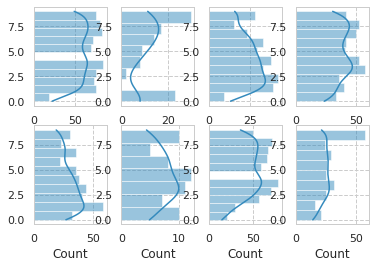

In [247]:

fig, axiss = plt.subplots(2, 4)
for wordid, word in enumerate(WordList2 + WordList1 + WordList3 + WordList4):
    sns.histplot(y=np.array(words_ranks_correct[word]), kde=True, ax=axiss[wordid//4][wordid-wordid//4*4])
    # sns.histplot(y=np.array(words_ranks_correct['Ġpolitics']), kde=True, ax=ax2)
plt.show()


In [230]:
[[len(words_ranks_correct[word]) for word in wordlist] for wordlist in [WordList1,WordList2,WordList3, WordList4]]

[[289, 154, 448], [702, 103, 643], [362, 39, 23], [566, 14, 256]]

In [231]:
stds = {}
means = {}
for word in words_ranks:
    a = np.array(words_ranks[word]).astype(np.float)
    std = np.std(a)
    stds[word] = std
    means[word] = np.mean(a)
sorted(means.items(), key=lambda x:x[1])




/home/hushengding/miniconda3/envs/ptuning/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


[('Ġchampionship', 26.707602339181285),
 ('Ġathletes', 27.850611376927166),
 ('Ġteams', 33.20361509835194),
 ('Ġteam', 37.853801169590646),
 ('Ġcoach', 37.87134502923977),
 ('Ġsports', 38.611376927166404),
 ('Ġathlete', 43.33652312599681),
 ('Ġsoccer ball', 52.80861244019139),
 ('Ġclubs', 53.91600212652844),
 ('Ġseason', 54.82083997873472),
 ('Ġathletics', 55.727804359383306),
 ('Ġleagues', 55.780435938330676),
 ('Ġsports man', 64.53694843168527),
 ('Ġsports field', 67.35672514619883),
 ('Ġclub', 69.78415736310473),
 ('Ġathletic', 73.11483253588517),
 ('Ġhockey', 79.64221158958001),
 ('Ġsports person', 88.57097288676236),
 ('Ġbaseball', 93.67729930887826),
 ('Ġsports book', 94.00956937799043),
 ('Ġgame', 94.849548112706),
 ('Ġchampion', 95.68952684742159),
 ('Ġbasketball', 97.87240829346092),
 ('Ġtournament', 100.69856459330144),
 ('Ġgames', 104.22381711855397),
 ('Ġgame player', 105.01594896331738),
 ('Ġsport like', 109.10845295055822),
 ('Ġsport less', 113.64965443912813),
 ('Ġsoccer

In [214]:
zip_data[mykeys[0]]
features[20]




{'text_a': 'IBM to hire even more new workers',
 'text_b': 'By the end of the year, the computing giant plans to have its biggest headcount since 1991.',
 'label': 3}

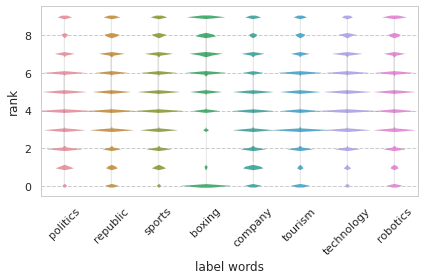

In [238]:
# disp_w = [key for key in words_ranks][20:30]
# disp_w = ['athletics','athletes', 'triathlon','cycling','skiing','race','olympics','championship', 'competitions','volleyball']
# y = np.array([words_ranks[key] for key in x])
# print(words_ranks_correct)
disp_w = WordList1+WordList2+WordList3+WordList4
data_for_violin = {'label words':[i[1:] for i in disp_w for j in words_ranks_correct[i]],
                  "rank":[j for i in disp_w for j in words_ranks_correct[i]]}
df_for_violin=pd.DataFrame(data_for_violin)
fig=plt.figure()
ax = sns.violinplot(x ='label words', y = 'rank', data=df_for_violin, alpha=0.9, bw=0.01, linewidth=0.05, width=1.3 )
plt.xticks(rotation=45)
fig.tight_layout()
fig.subplots_adjust()

plt.savefig("../plots/violin.png",bbox_inches="tight")

In [216]:
from transformers import RobertaConfig, RobertaTokenizer,RobertaForMaskedLM
model_classes = {'roberta': {
        'config': RobertaConfig,
        'tokenizer': RobertaTokenizer,
        'model':RobertaForMaskedLM,
    }}
def get_tokenizer():
    # args = get_args()
    model_config = model_classes['roberta']
    tokenizer = model_config['tokenizer'].from_pretrained(
        "../../plm_model_cache/roberta-large")
    # tokenizer.add_tokens(special)
    return tokenizer
tokenizer = get_tokenizer()

orgdict= {}
for l in L:
    aaa = []
    for x in l:
        xp = " ".join(tokenizer.tokenize(" "+x))
        orgdict[xp] = x

        
Lp = [set(l) for l in L ]
def find_in_vocab(x, mapping, vocab): 
    ret = -1
    for i, v in enumerate(vocab):
        if mapping[x] in v:
            ret = i
    if ret==-1:
        print("Not found!")
        return -1
    return ret
    # x2 = "".join(x.split(" "))


NameError: name 'L' is not defined

In [5]:
# idx= 0
num_instance = len(labels)
word_with_class = []
for idx in range(num_instance):
    word_with_class.append([(orgdict[x], find_in_vocab(x, orgdict, Lp))for x in  topkchoices[idx]])

# print(labels[idx], preds[idx], [(orgdict[x], find_in_vocab(x, orgdict, Lp))for x in  topkchoices[idx]])

Count the rank of each word in correctly predicted instance.

In [37]:


words_ranks = {}
cur_class = 1
for idx in range(num_instance):
    if labels[idx]==preds[idx] and labels[idx]==cur_class:
        for rank, _ in enumerate(word_with_class[idx]):
            word, wc = _
            if wc==cur_class:
                if word not in words_ranks:
                    words_ranks[word] = [rank]
                else:
                    words_ranks[word].append(rank)

           

        

In [38]:
words_ranks = {key:np.array(words_ranks[key]) for key in words_ranks}

In [35]:
import seaborn as sns
import pandas as pd
# print(words_ranks)
# tips = sns.load_dataset("tips")
# tips

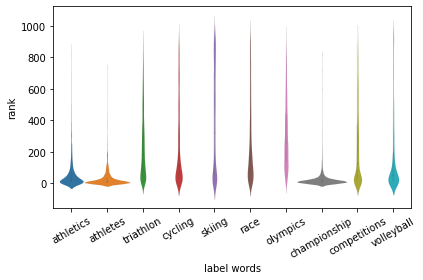

In [77]:
# disp_w = [key for key in words_ranks][20:30]
disp_w = ['athletics','athletes', 'triathlon','cycling','skiing','race','olympics','championship', 'competitions','volleyball']
# y = np.array([words_ranks[key] for key in x])
data_for_violin = {'label words':[i for i in disp_w for j in words_ranks[i]],
                  "rank":[j for i in disp_w for j in words_ranks[i]]}
df_for_violin=pd.DataFrame(data_for_violin)
fig=plt.figure()
ax = sns.violinplot(x ='label words', y = 'rank', data=df_for_violin, alpha=0.9, bw=0.15, linewidth=0.05, width=1.4 )
plt.xticks(rotation=30)
fig.tight_layout()
fig.subplots_adjust()

plt.savefig("../plots/violin.png",bbox_inches="tight")

/home/hushengding/miniconda3/envs/ptuning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hushengding/miniconda3/envs/ptuning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hushengding/miniconda3/envs/ptuning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

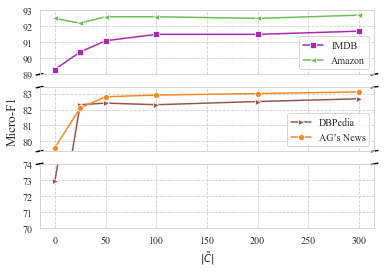

In [5]:
import seaborn as sns
from brokenaxes import brokenaxes
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# plt.style.use('ggplot')
# sns.set(style="darkgrid")
plt.rc('font',family='Times New Roman')
# sns.set_style("whitegrid", {'grid.linestyle': '--'})
dbpedia_mean = [72.9, 82.3, 82.4, 82.3, 82.5, 82.67]
agnews_mean = [79.6, 82.1, 82.8, 82.9, 83.0, 83.1]
imdb_mean = [89.3, 90.4, 91.1, 91.5, 91.5, 91.7]
amazon_mean = [92.5, 92.2, 92.6, 92.6, 92.5, 92.7]

x_axis = [0, 25, 50, 100, 200, 300]


# bax=brokenaxes(xlims=((0,325)),ylims=((81,84),(90,95)),hspace=0.05)
f, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharex=True)
# plt.figure()
# plt.xlim(0,325)
# brokenaxes(ylims=((81,84),(92,95)),hspace=0.05)
# plt.xlim(0,325)498df9
ax = sns.lineplot(np.array(x_axis), np.array(dbpedia_mean), marker='>', color='#91574d',label='DBPedia',ax = ax2)
ax = sns.lineplot(np.array(x_axis), np.array(dbpedia_mean), marker='>', color='#91574d', label='DBPedia',ax = ax3)
ax = sns.lineplot(np.array(x_axis), np.array(agnews_mean), marker='o', color='#f78923', label='AG’s News',ax=ax2)
ax = sns.lineplot(np.array(x_axis), np.array(imdb_mean), marker='s', color='#a929ad',markerfacecolor='#a929ad',label='IMDB',ax=ax1)
ax = sns.lineplot(np.array(x_axis), np.array(amazon_mean), marker='<', color='#6dbc5a', label='Amazon',ax=ax1)


# for dataset in ['agnews', 'dbpedia', ]:
ax2.set_ylim(79.4,83.4)
ax1.set_ylim(89,93)
ax3.set_ylim(70,74)
# ax1.get_xaxis().set_visible(False)
# ax2.get_xaxis().set_visible(False)
ax2.set_ylabel("")
ax1.set_ylabel("")
ax3.set_ylabel("")

ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(50))

f.text(0.05, 0.50, 'Micro-F1', va='center', rotation='vertical', size=13)

ax3.get_legend().remove()
plt.xlabel(r"$\|\tilde{C}\|$")

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal


kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



plt.savefig("../plots/calistudy.pdf")